In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Load the different datasets for client A and client B 

In [3]:
#Dataset used by client A
dataset_A = pd.read_csv('./Cardiovascular_Disease_Dataset.csv')

# Dataset used by client B
dataset_B = pd.read_csv('./Kaggle_Cardiovascular_dataset/heart.csv')

### Training client 1 and client 2 separately and storing their weights and bias

### *Client 1*

In [4]:
dataset_A.head(7)

patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   
5     148462   24       1          1        173                0   
6     168686   79       1          2        130              240   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   
5                  0                0           161              0      4.7   
6                  0                2           157              0      2.5   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2      1                 0       0  
3      2                 2       1  
4      3                 2       1  
5      3                 2       1  
6      2                 1       1

In [5]:
dataset_A.info()
dataset_A.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000           0.000000         0.000000     71.000000   
25%         235.750000           0.000000         0.000000    119.750000   
50%         318.000000           0.000000         1.000000    146.000000   
75%         404.250000           1.000000         1.000000    175.000000   
max         602.000000           1.000000         2.000000    202.000000   

       exerciseangia      oldpeak        slope  noofmajorvessels       target  
count    1000.000000  1000.000000  1000.000000       1000.000000  1000.000000  
mean        0.498000     2.707700     1.540000          1.222000     0.580000  
std         0.500246     1.720753     1.003697          0.977585     0.493805  
min         0.000000     0.000000     0.000000          0.000000     0.000000  
25%         0.000000     1.300000     1.000000          0.000000     0.000000  
50%         0.000000     2.400000     2.000000          1.000000     1.000000  
75%         1.000000     4.100000     2.000000          2.000000     1.000000  
max         1.000000     6.200000     3.000000          3.000000     1.000000

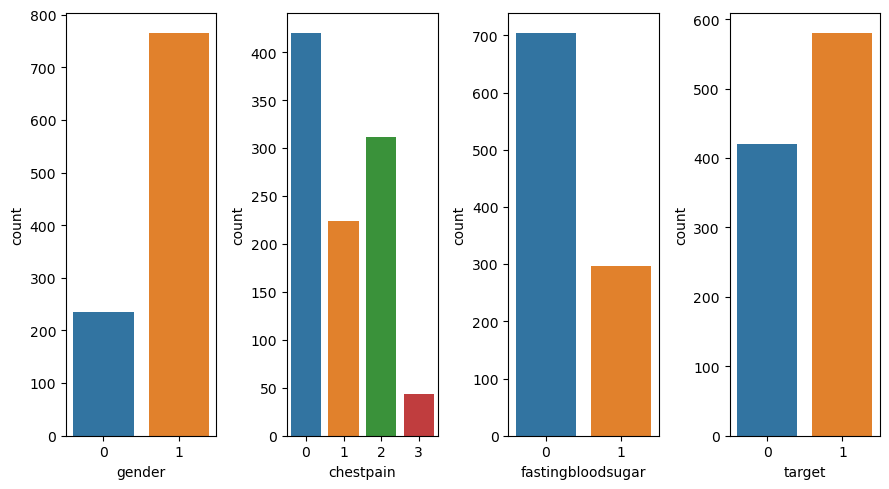

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(9,5))
plt.subplots_adjust(hspace=100)
sns.countplot(data=dataset_A, x='gender',ax=ax[0])
sns.countplot(data=dataset_A,x='chestpain',ax=ax[1])
sns.countplot(data=dataset_A,x='fastingbloodsugar',ax=ax[2])
sns.countplot(data=dataset_A,x='target',ax=ax[3])
plt.tight_layout() 
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

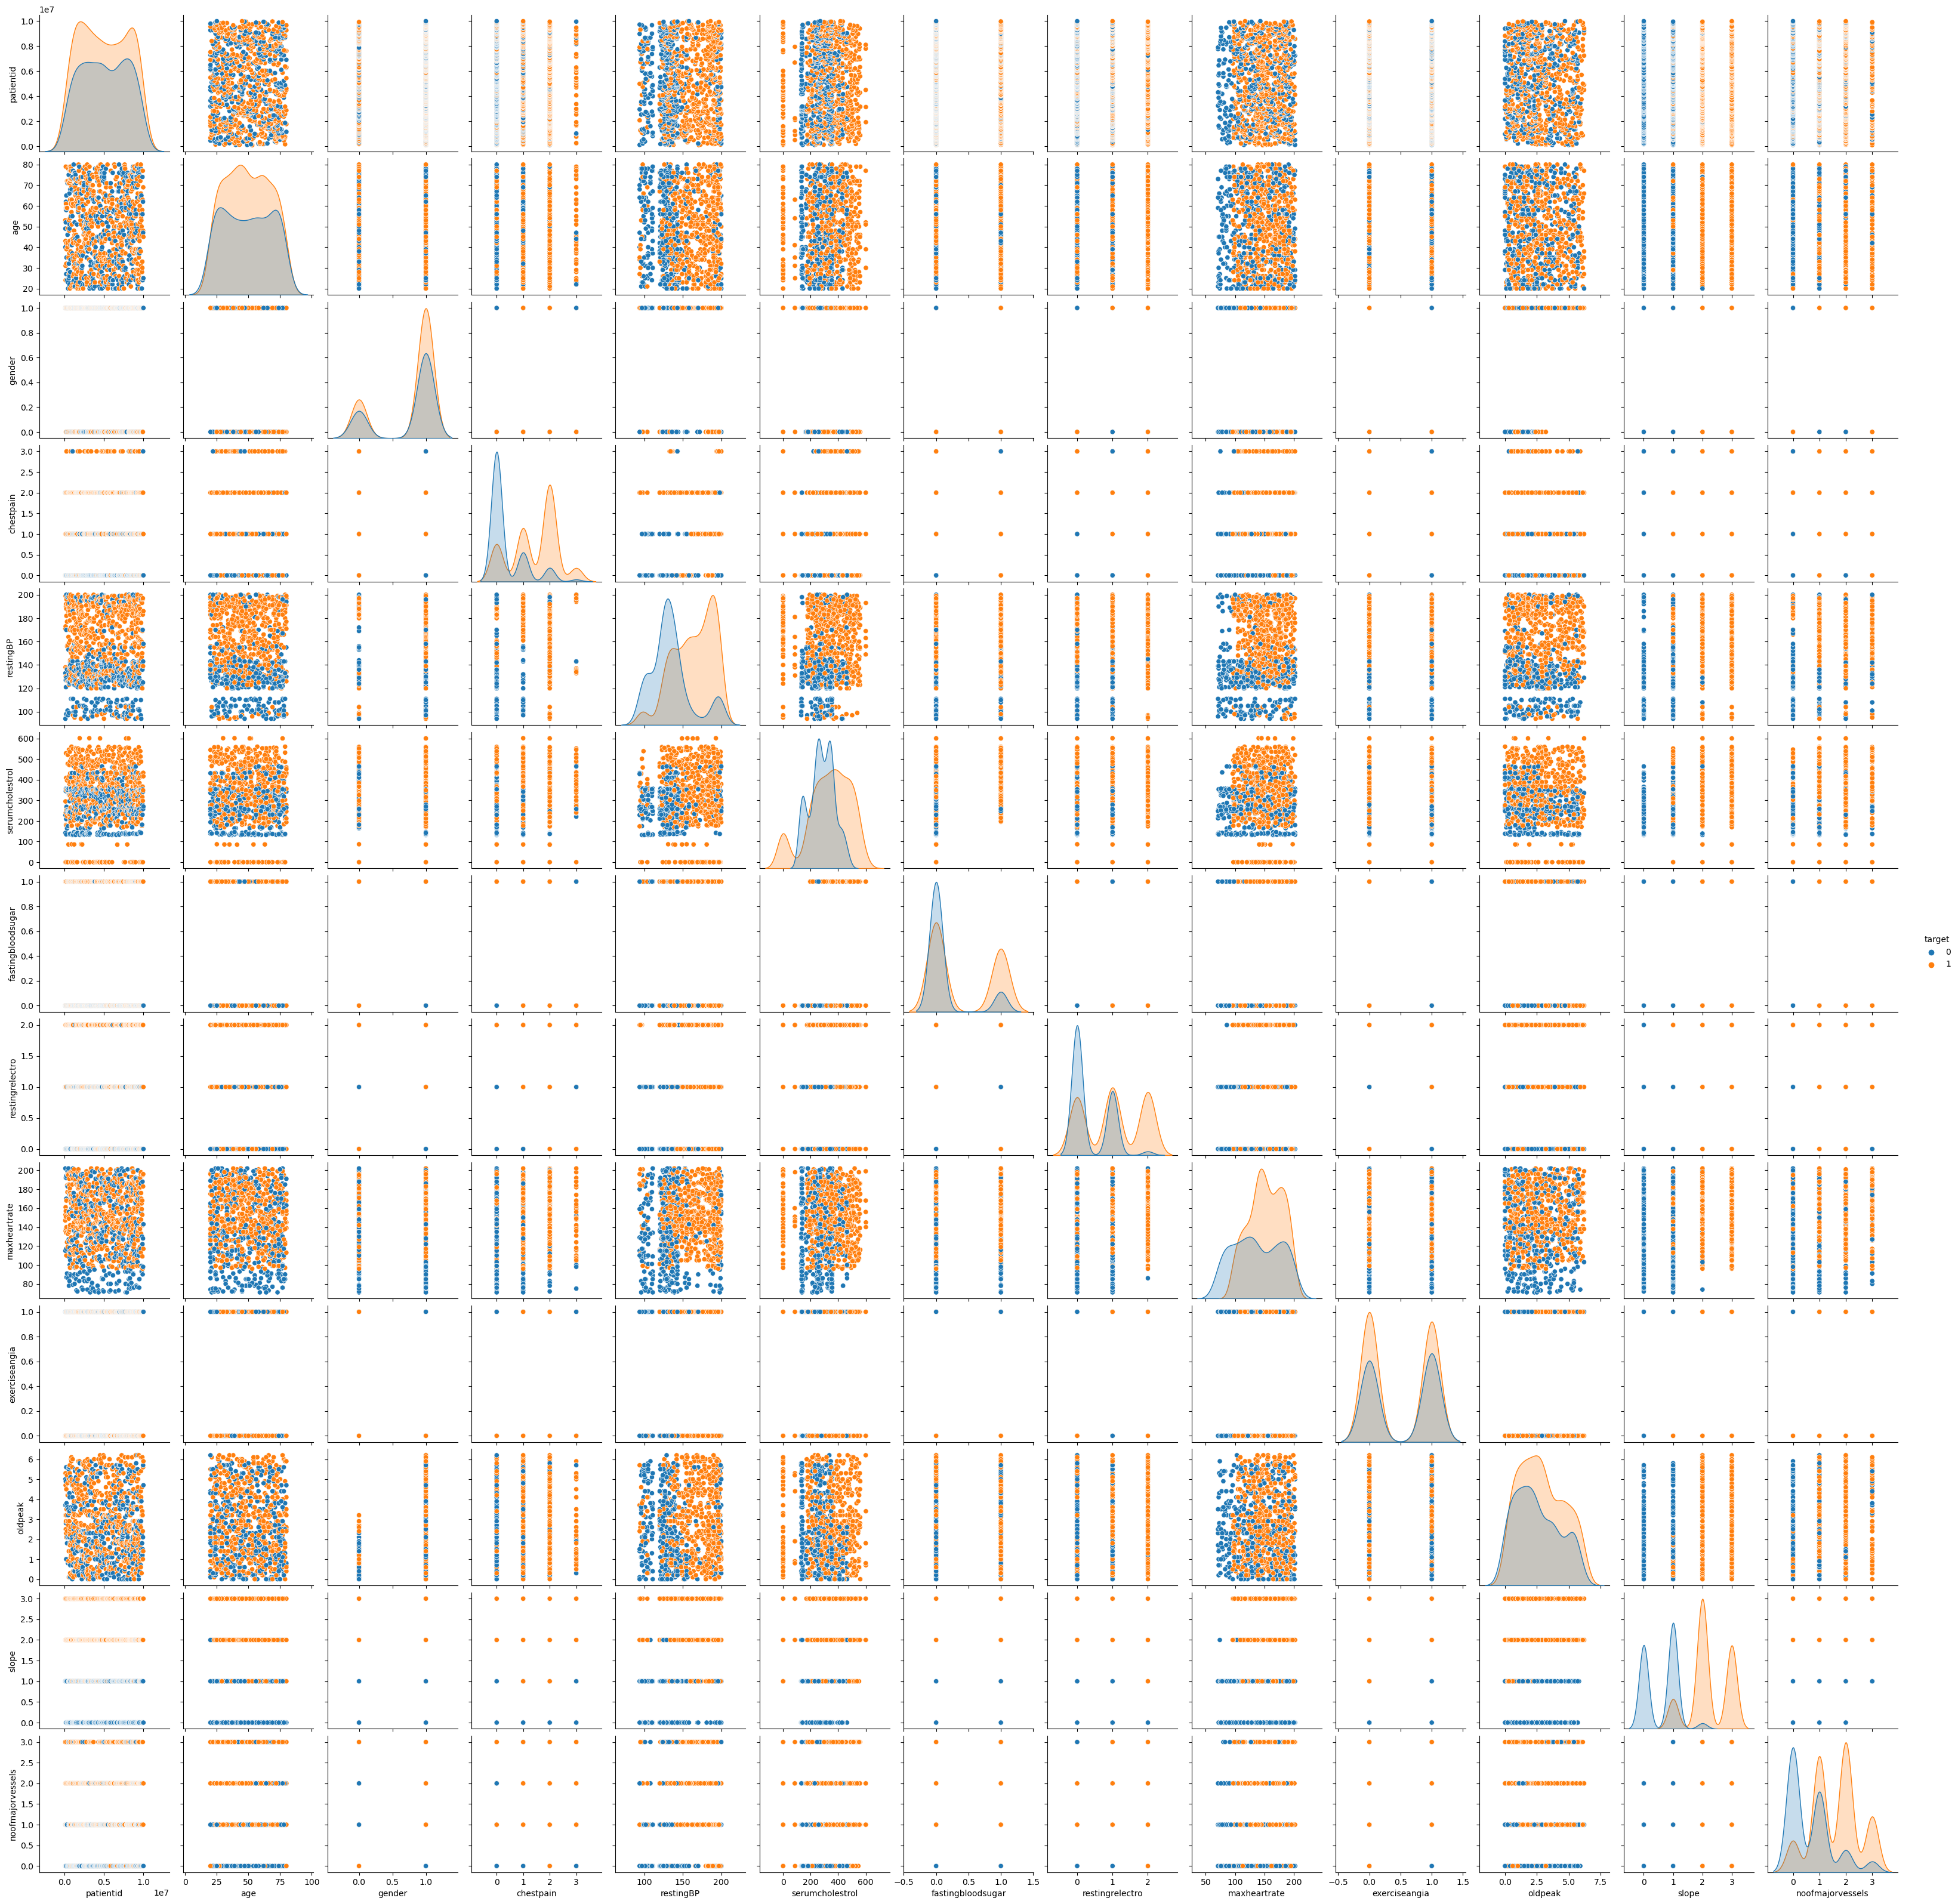

In [7]:
sns.pairplot(dataset_A,hue='target')

<Axes: >

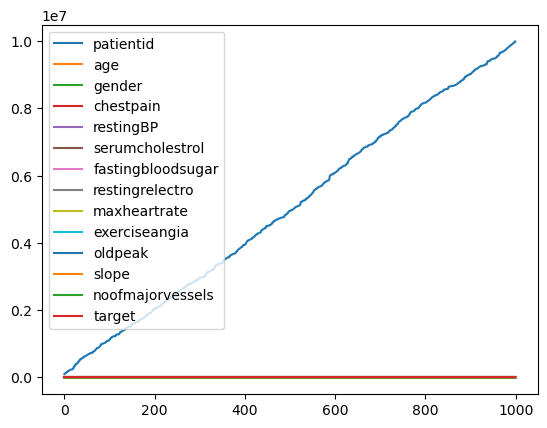

In [8]:
dataset_A.plot()

In [9]:
X_A = dataset_A.drop(columns=['target','patientid','noofmajorvessels'],axis=0)
Y_A = dataset_A['target']

In [10]:
X_A.head(2)

age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   53       1          2        171                0                  0   
1   40       1          0         94              229                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  
0                1           147              0      5.3      3  
1                1           115              0      3.7      1

In [11]:
Y_A.head(2)

0    1
1    0
Name: target, dtype: int64

In [12]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, Y_A, test_size=0.20,random_state=42)

In [13]:
logistic_A = LogisticRegression(fit_intercept=True,solver='liblinear',random_state=42)

In [14]:
logistic_A.fit(X_train_A,y_train_A)

LogisticRegression(random_state=42, solver='liblinear')

In [45]:
model_A_params = {
    "W":logistic_A.coef_,
    "b":logistic_A.intercept_
}

In [46]:
print(model_A_params)

{'W': array([[-1.79585626e-02,  1.18453438e+00,  8.84078414e-01,
         4.52386081e-03, -1.06040926e-03,  9.07231329e-01,
         8.30603099e-01, -3.39478844e-03, -2.23976007e-01,
        -6.85838227e-01,  4.18161434e+00]]), 'b': array([-4.82555088])}


In [17]:
y_hat_A = logistic_A.predict(X_test_A)
print(f"The metrics (Accuracy score) of model A is : {accuracy_score(y_test_A,y_hat_A)}")
print(f"The confusion matrix of model A is :\n {confusion_matrix(y_hat_A,y_test_A)}")
print(f"The classification report of model A is : \n{classification_report(y_hat_A,y_test_A)}")

The metrics (Accuracy score) of model A is : 0.97
The confusion matrix of model A is :
 [[ 79   2]
 [  4 115]]
The classification report of model A is : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        81
           1       0.98      0.97      0.97       119

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



## *Client 2*

In [18]:
dataset_B.head(7)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0

In [19]:
dataset_B.info()
dataset_B.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


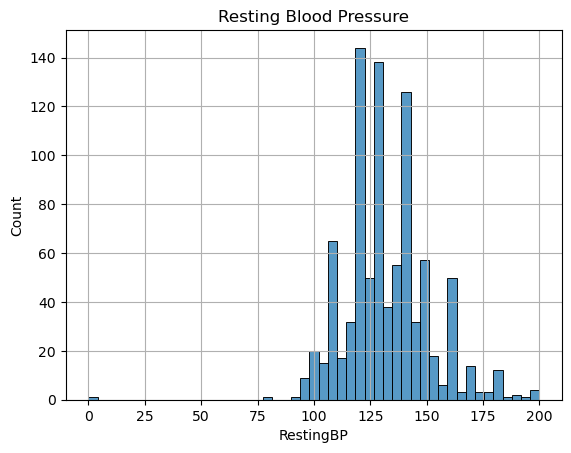

In [20]:
sns.histplot(dataset_B['RestingBP'])
plt.title('Resting Blood Pressure')
plt.grid()
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


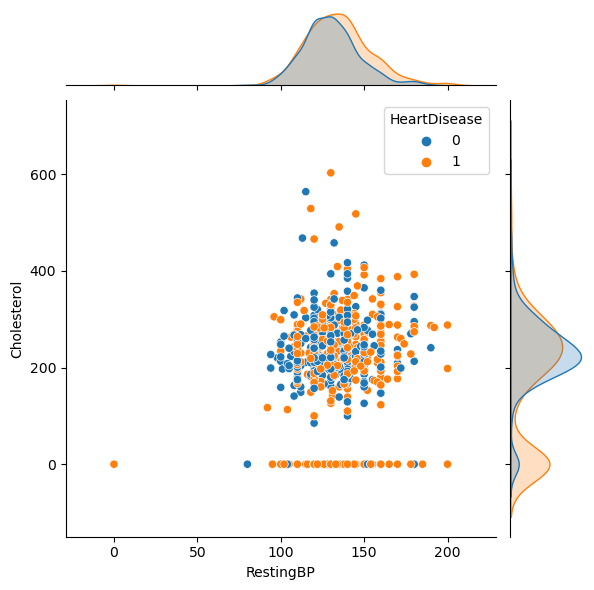

In [21]:
sns.jointplot(dataset_B, x='RestingBP',y='Cholesterol',hue='HeartDisease')

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level f

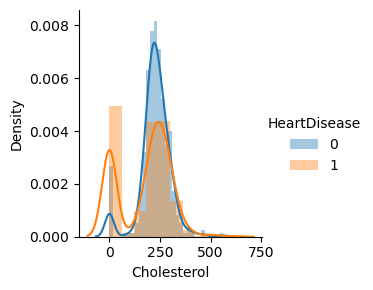

In [22]:
sns.FacetGrid(dataset_B, hue='HeartDisease').map(sns.distplot,'Cholesterol').add_legend()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

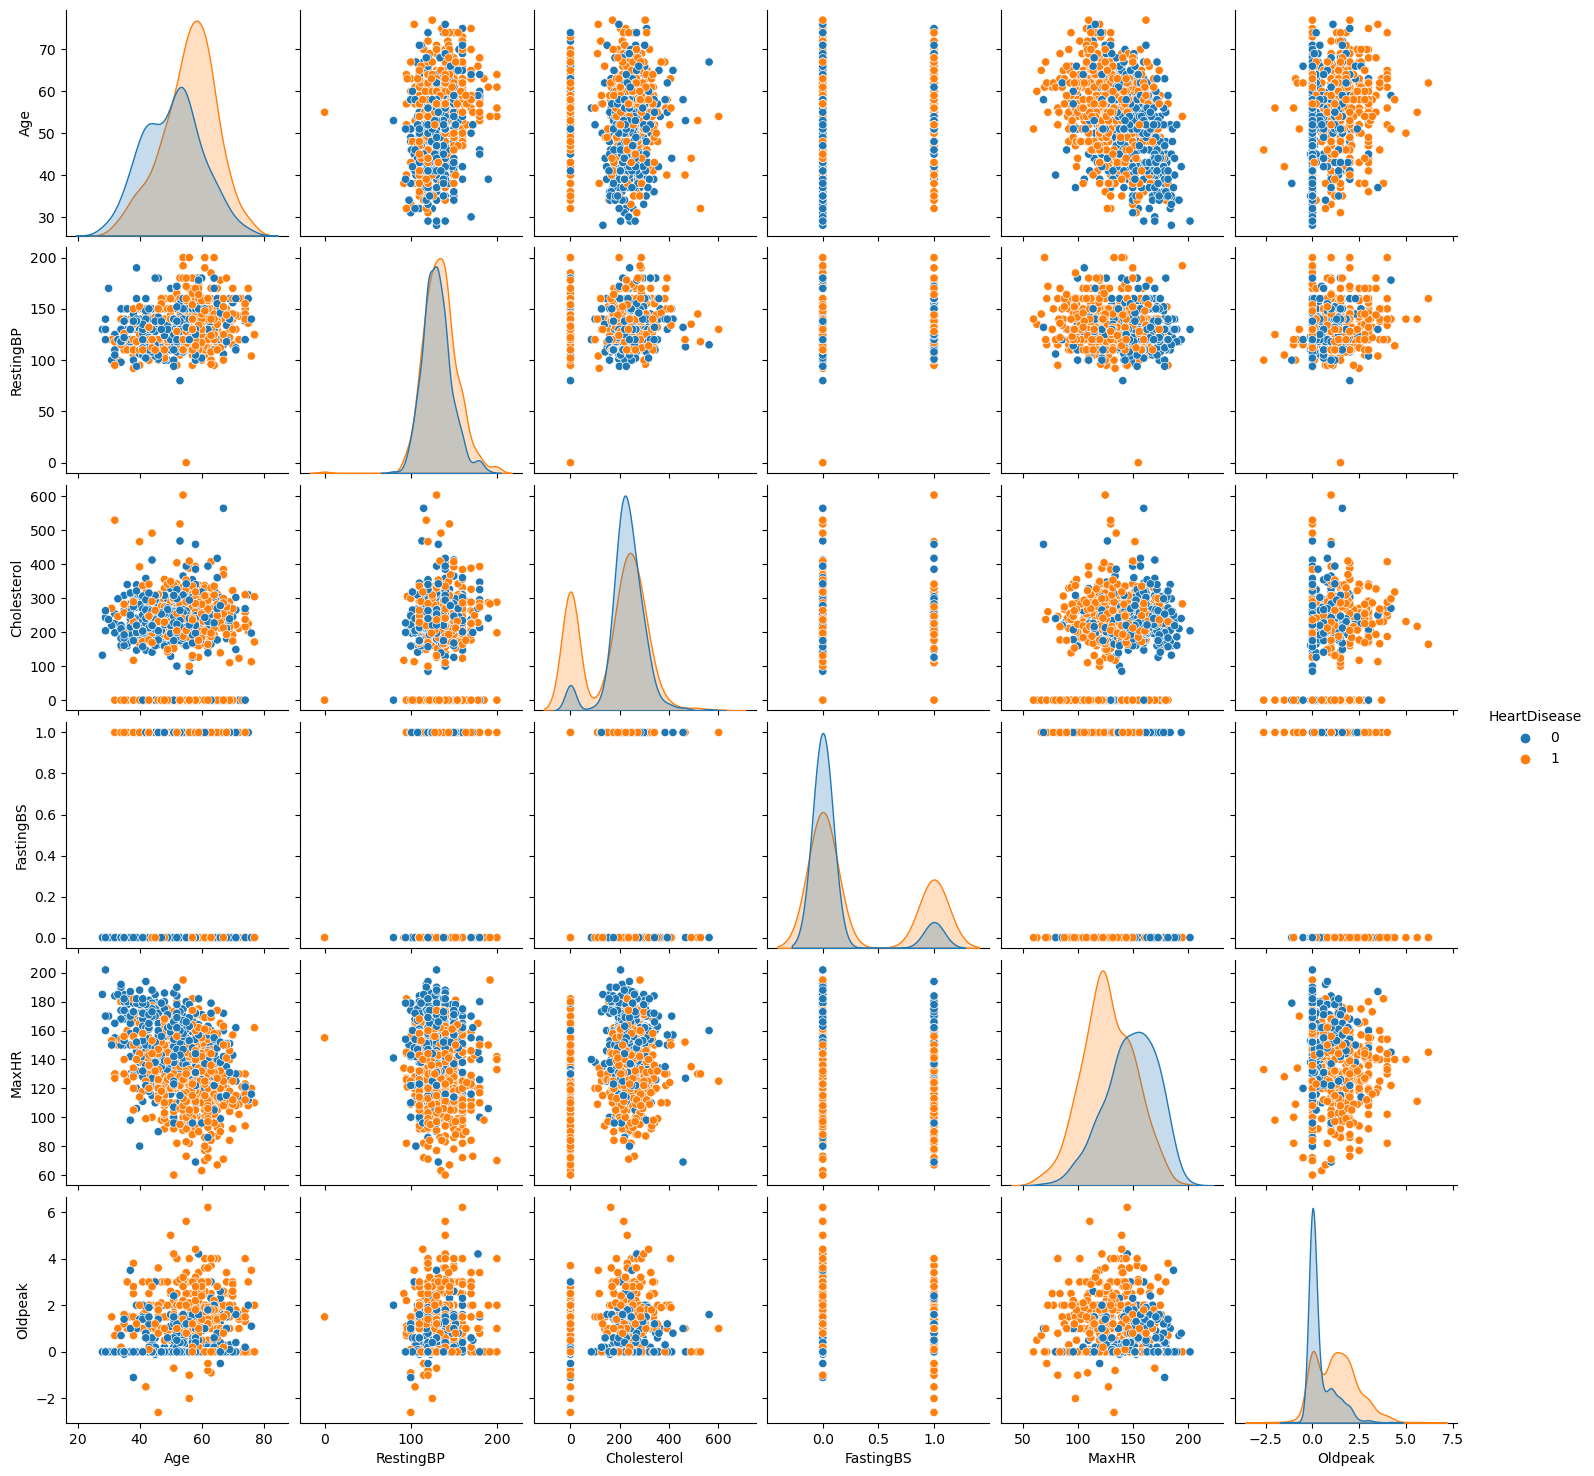

In [23]:
sns.pairplot(dataset_B,hue='HeartDisease')

In [24]:
le = LabelEncoder()

dataset_B['Sex'] = le.fit_transform(dataset_B['Sex'])
dataset_B['ChestPainType'] = le.fit_transform(dataset_B['ChestPainType'])
dataset_B['RestingECG'] = le.fit_transform(dataset_B['RestingECG'])
dataset_B['ST_Slope'] = le.fit_transform(dataset_B['ST_Slope'])
dataset_B['ExerciseAngina'] = le.fit_transform(dataset_B['ExerciseAngina'])

num_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

for i in num_cols:
    scale = StandardScaler().fit(dataset_B[[i]])
    # transform the training data column
    dataset_B[i] = scale.transform(dataset_B[[i]])
    
    # transform the testing data column
    dataset_B[i] = scale.transform(dataset_B[[i]])

In [25]:
dataset_B.head(2)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -5.828074    1              1  -7.132789    -1.810888  -1.855319   
1 -5.726810    0              2  -7.074378    -1.820008  -1.855319   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1 -5.322014               0 -1.613334         2             0  
1           1 -5.346724               0 -0.733310         1             1

In [26]:
X_B = dataset_B.drop(columns=['HeartDisease'],axis=0)
Y_B = dataset_B['HeartDisease']

In [27]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B,Y_B,test_size=0.20,random_state=42)

In [28]:
logistic_B = LogisticRegression(solver='lbfgs',random_state=42,fit_intercept=True,max_iter=500)

In [29]:
logistic_B.fit(X_train_B,y_train_B)

LogisticRegression(max_iter=500, random_state=42)

In [47]:
model_B_params = {
    "W":logistic_B.coef_,
    "b":logistic_B.intercept_
}
print(model_B_params)

{'W': array([[ 1.07357053,  1.3162452 , -0.62253127,  0.15400157, -0.32911919,
         0.21841537, -0.0524348 , -0.79453423,  1.26184363,  0.46579503,
        -1.75307374]]), 'b': array([4.56469607])}


In [48]:
y_hat_B = logistic_B.predict(X_test_B)
print(f"The metrics (Accuracy score) of model B is : {accuracy_score(y_test_B,y_hat_B)*100}%")
print(f"The confusion matrix of model B is :\n {confusion_matrix(y_hat_B,y_test_B)}")
print(f"The classification report of model B is : \n{classification_report(y_hat_B,y_test_B)}")

The metrics (Accuracy score) of model B is : 84.78260869565217%
The confusion matrix of model B is :
 [[68 19]
 [ 9 88]]
The classification report of model B is : 
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        87
           1       0.82      0.91      0.86        97

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



## Implementing different Federated Aggregation techniques
The idea is to implement different aggregation techniques to see which produces the best result here.
Also, how the different aggregation techniques are working.



In [49]:
def global_aggregate_model(parameters1, parameters2):

    # we're using Federated Averaging
    # This is nA + nB where nA = 500 and nB = 500, as we have splitted the dataset equally
    nA, nB = 1000, 1000
    N = nA + nB

    W1 = parameters1['W'].T
    W2 = parameters2['W'].T

    Avg_W = ( nA*W1 + nB*W2 )/ N

    # Same calculation for the bias

    b1 = parameters1['b']
    b2 = parameters2['b']

    Avg_b = ( nA*b1 + nB*b2 ) / N

    return Avg_W, Avg_b
    

In [70]:
def server_model(parameters1, parameters2, X, Y):

    W,B = global_aggregate_model(parameters1, parameters2)
    print("The weights after aggregating : " ,W.T)
    print("The bias after aggregating : " ,B)    
    Z = np.dot(W.T,X.T) + B

    A = 1 / (1+np.exp(-Z))

    m = X.shape[0]
    Y_predict = np.zeros((1,m))

    
    for i in range(A.shape[1]):
        
        if A[0,i] > 0.5:
            Y_predict[0,i] = 1
        else:
            Y_predict[0,i] = 0
        
    return Y_predict


In [71]:
dataset = pd.read_csv('./Modified_Cardiovascular_Disease_Dataset.csv')

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   947 non-null    int64  
 1   gender                947 non-null    int64  
 2   chestpain             947 non-null    int64  
 3   restingBP             947 non-null    int64  
 4   serumcholestrol       947 non-null    int64  
 5   fastingbloodsugar     947 non-null    int64  
 6   restingrelectro       947 non-null    int64  
 7   maxheartrate          947 non-null    int64  
 8   exerciseangia         947 non-null    int64  
 9   oldpeak               947 non-null    float64
 10  slope                 947 non-null    int64  
 11  noofmajorvessels      947 non-null    int64  
 12  Unnamed: 12           0 non-null      float64
 13  chol_heart_ratio      947 non-null    float64
 14  age_pressure_product  947 non-null    float64
 15  stress_indicator      9

In [73]:
dataset.head(3)

age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   40       1          0         94              229                  0   
1   49       1          2        133              142                  0   
2   43       1          0        138              295                  1   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1           115              0      3.7      1   
1                0           202              1      5.0      1   
2                1           153              0      3.2      2   

   noofmajorvessels  Unnamed: 12  chol_heart_ratio  age_pressure_product  \
0                 1          NaN          1.991304                 37.60   
1                 0          NaN          0.702970                 65.17   
2                 2          NaN          1.928105                 59.34   

   stress_indicator  activity_level  risk_factor  target  
0             3.478               0            1       0  
1             6.650               1            2       0  
2             4.416               0            2       1

In [74]:
X = dataset_A.drop(columns=['target','patientid','noofmajorvessels'],axis=0)
Y =  dataset_A['target']

Y_hat = server_model(parameters1=model_A_params, parameters2=model_B_params, X = X, Y = Y)
Y_hat = Y_hat.T
Y_hat.shape
print("The report after Federated Aggregation: ")
print(accuracy_score(Y_hat,Y))
print(classification_report(Y_hat,Y))
print(confusion_matrix(Y_hat,Y))

The weights after aggregating :  [[ 0.52780599  1.25038979  0.13077357  0.07926272 -0.1650898   0.56282335
   0.38908415 -0.39896451  0.51893381 -0.1100216   1.2142703 ]]
The bias after aggregating :  [-0.1304274]
The report after Federated Aggregation: 
0.427
              precision    recall  f1-score   support

         0.0       1.00      0.42      0.59       991
         1.0       0.01      0.89      0.03         9

    accuracy                           0.43      1000
   macro avg       0.51      0.66      0.31      1000
weighted avg       0.99      0.43      0.59      1000

[[419 572]
 [  1   8]]
